In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

In [31]:
#Data Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
sns.set_style(style= "whitegrid")
%matplotlib inline

In [128]:
#Scikit Modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [6]:
train = pd.read_csv(r'C:\Users\Vinay\Documents\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


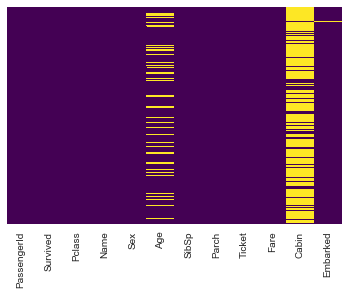

In [9]:
sns.heatmap(train.isnull(), cbar= False, yticklabels= False, cmap= "viridis")

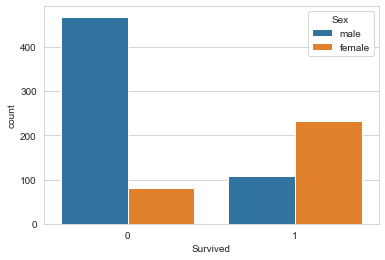

In [13]:
sns.countplot('Survived', data = train, hue= 'Sex')

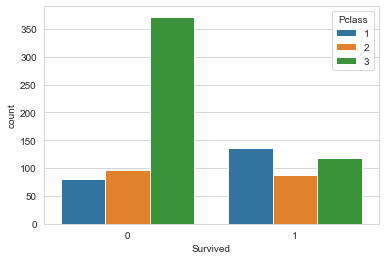

In [14]:
sns.countplot('Survived', data = train, hue= 'Pclass')

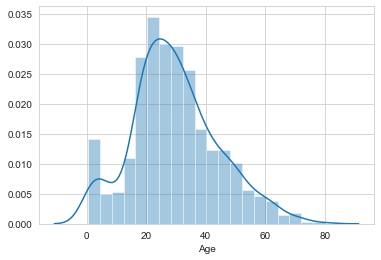

In [20]:
sns.distplot(train['Age'].dropna())

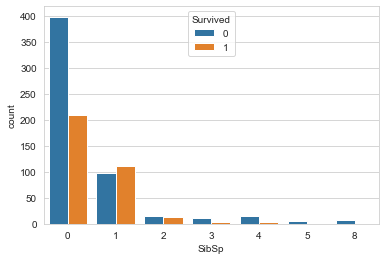

In [24]:
sns.countplot(train['SibSp'], hue= train['Survived'])

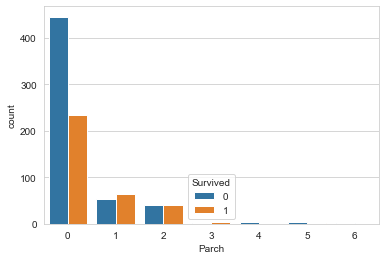

In [25]:
sns.countplot(train['Parch'], hue = train['Survived'])

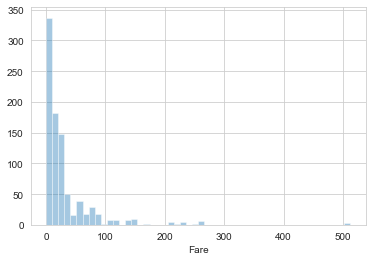

In [28]:
sns.distplot(train['Fare'], kde = False)

In [29]:
import cufflinks as cf

In [30]:
cf.go_offline()

In [32]:
train['Fare'].iplot(kind = "hist")

In [36]:
#Finding correlation of age with other columns
train.corr()['Age']

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

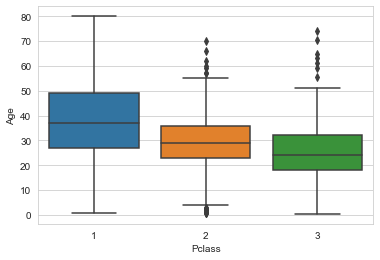

In [38]:
sns.boxplot(x = 'Pclass', y= 'Age', data = train)

In [39]:
#Creating a function to fill the age

def impute_age(col) :
    Age = col[0]
    Class = col[1]
    
    if pd.isnull(Age) :
        
        if Class == 1 :
            return 37
        elif Class == 2 :
            return 29
        else :
            return 24
    else:
        return Age
        

In [41]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis =1)

In [44]:
sum(train['Age'].isna())

0

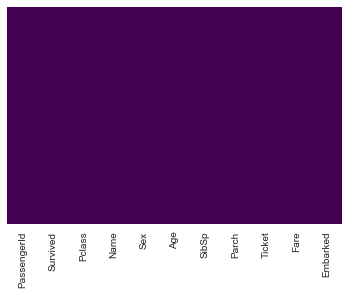

In [49]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False, cmap= "viridis")

In [46]:
#We would be dropping Cabin columnn
train.drop(["Cabin"], axis=1, inplace= True)

In [48]:
train.dropna(inplace= True)

In [54]:
#Creating dummy data for Categorical Columns

sex = pd.get_dummies(train['Sex'], drop_first= True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [56]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
train = pd.concat([train, sex, embarked], axis =1)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [61]:
train.drop(["Sex", "Embarked", "Ticket", "Name", "PassengerId"], axis =1, inplace= True )

In [62]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


We have Pclass as Categorical column but right now we won't be making it as category column. Will do that in the next half

In [63]:
X = train.drop(["Survived"], axis =1)
y = train["Survived"]

In [170]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [173]:
pclass_tr = pd.get_dummies(X["Pclass"],drop_first=True )
X = pd.concat([X, pclass_tr], axis=1)

In [175]:
X.drop(["Pclass"], axis=1, inplace= True)

In [176]:
X.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [177]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [68]:
#We will be using Logistic & Linear Discriminant Analysis here

In [91]:
logmodel = LogisticRegression()

In [92]:
logmodel.fit(X_train, y_train)

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
predictions = logmodel.predict(X_test)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       167
           1       0.75      0.69      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_test, predictions)

array([[144,  23],
       [ 31,  69]], dtype=int64)

In [98]:
from sklearn import metrics

In [99]:
metrics.accuracy_score(y_test, predictions)

0.797752808988764

In [107]:
from sklearn.metrics import precision_recall_curve

In [108]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

In [109]:
precision

array([0.37453184, 0.75      , 1.        ])

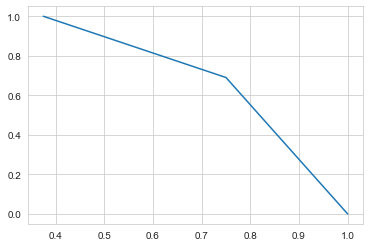

In [112]:
sns.lineplot(precision, recall)

Results

In [113]:
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')

Accuracy: 0.797752808988764
Precision: 0.75
Recall: 0.69


In [114]:
confusion_matrix(y_test, predictions)

array([[144,  23],
       [ 31,  69]], dtype=int64)

# Converting Pclass in Categorical Column

In [181]:

X.head()


,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [182]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Age      889 non-null float64
SibSp    889 non-null int64
Parch    889 non-null int64
Fare     889 non-null float64
male     889 non-null uint8
Q        889 non-null uint8
S        889 non-null uint8
2        889 non-null uint8
3        889 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 79.1 KB


In [149]:
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [150]:
train = pd.concat([train, pclass], axis=1)

In [179]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,3,35.0,0,0,8.0500,1,0,1,0,1


In [153]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [132]:
#Creating Models
logistic_regression = LogisticRegression()
lda = LDA()

In [133]:
logistic_regression.fit(X_train, y_train)
lda.fit(X_train, y_train)


C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning:

Variables are collinear.



LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [134]:
#Creating Test Data Set

In [137]:
test = pd.read_csv(r'C:\Users\Vinay\Downloads\test(2).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [139]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis =1)

In [140]:
#We would be dropping Cabin columnn
test.drop(["Cabin"], axis=1, inplace= True)

In [141]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [143]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S
417,1309,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,C


In [145]:
test['Fare'].fillna(test['Fare'].mean(), inplace =True)

In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [154]:

sex = pd.get_dummies(test['Pclass'], drop_first=True)
embarked = pd.get_dummies(test['Pclass'], drop_first=True)

In [155]:
test = pd.concat([test, pclass, sex, embarked], axis=1)

In [156]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,2,3,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,0,1,0,1


In [158]:
test.drop([2, 3], axis=1, inplace= True)

In [159]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [161]:
pclass = pd.get_dummies(test['Pclass'], drop_first=True)
test = pd.concat([test, pclass], axis=1)

In [165]:
test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1


In [164]:
test.drop(["Pclass"], axis =1, inplace= True)

In [166]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embarked = pd.get_dummies(test['Embarked'], drop_first=True)
test = pd.concat([test, sex,embarked ], axis=1)

In [167]:
test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,1,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,0,0,1


In [168]:
test.drop(["PassengerId", "Name", "Sex", "Ticket", "Embarked"], axis=1, inplace=True)

In [169]:
test.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1
